In [1]:
!pip install torchvision
!pip install --upgrade torchvision torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 5.0 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 MB 6.0 MB/s  0:00:12m0:00:0100:01
  Attempting uninstall: torch
    Found existing installation: torch 2.8.0
    Uninstalling torch-2.8.0:━━━━━━━━━━━━━━━━━━━ 0/2 [torch]
      Successfully uninstalled torch-2.8.0━━ 0/2 [torch]
  Attempting uninstall: torchvision━━━━━━━━━━━━━ 0/2 [torch]
    Found existing installation: torchvision 0.23.032m0/2 [torch]
    Uninstalling torchvision-0.23.0:━━━━━━━━ 0/2 [torch]
      Successfully uninstalled torchvision-0.23.00/2 [torch]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [torchvision] [torchvision]
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
executorch 0.7.0 requires numpy>=2.0.0; python_version >= "3.10", but you have numpy 1.26.4 which is incompatible.
executorch 0.7.0 requir

In [2]:
import os
import random
import cv2
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import random_split, DataLoader

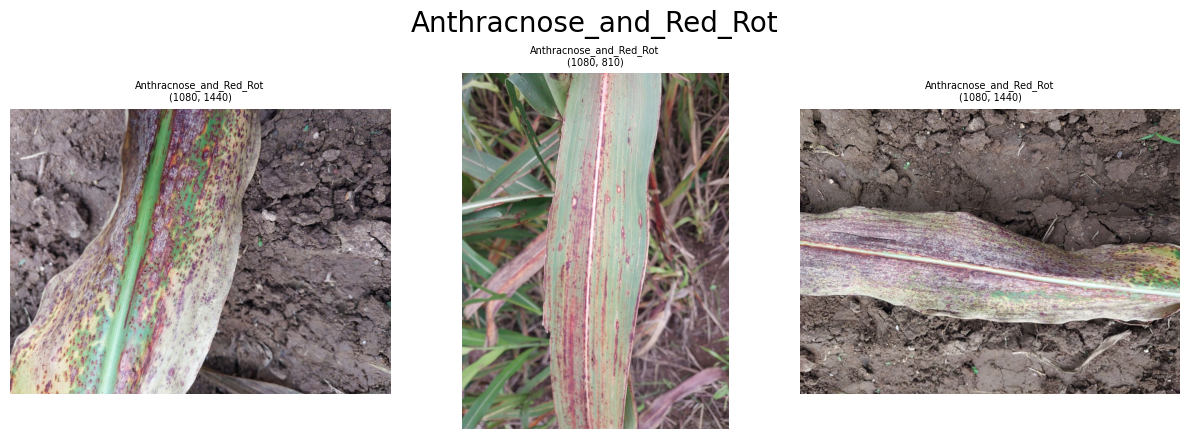

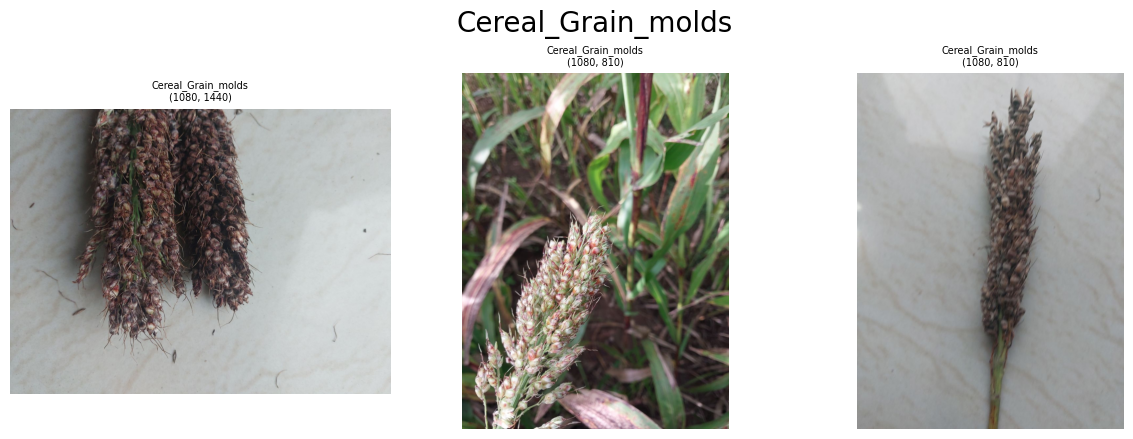

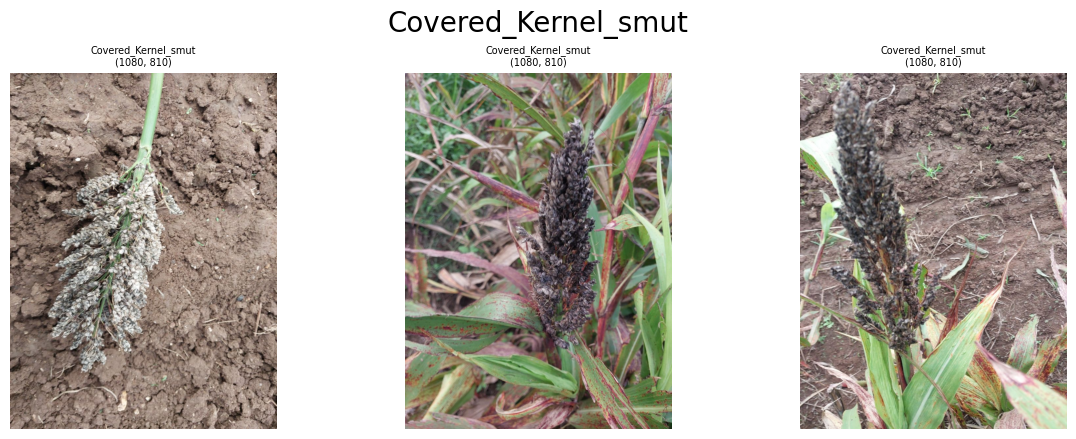

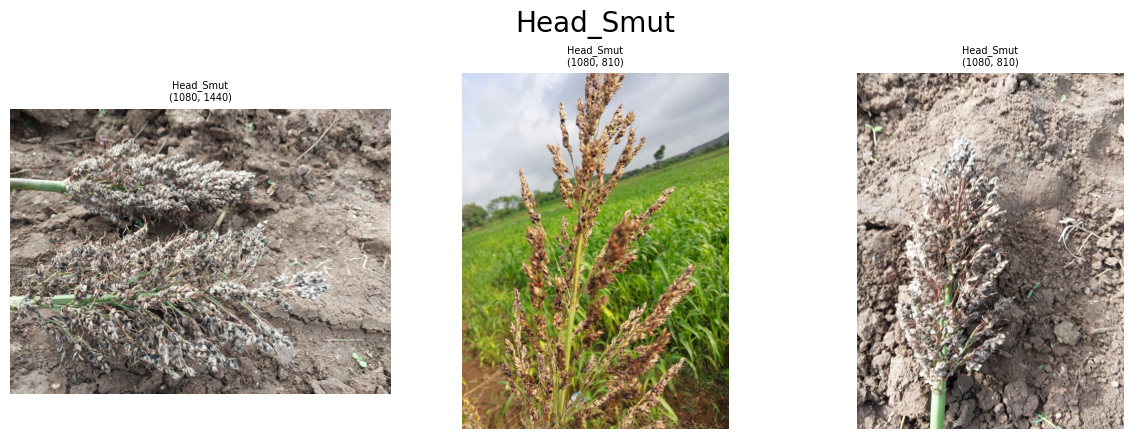

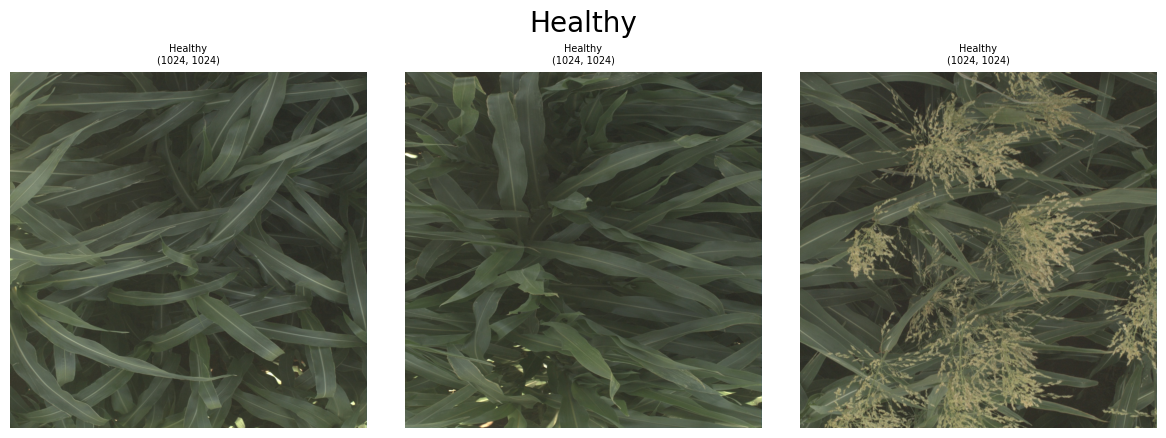

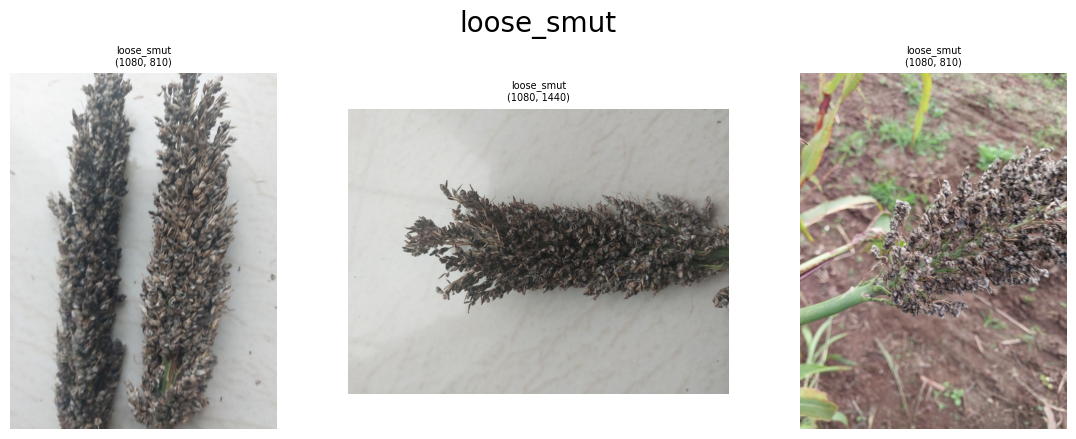

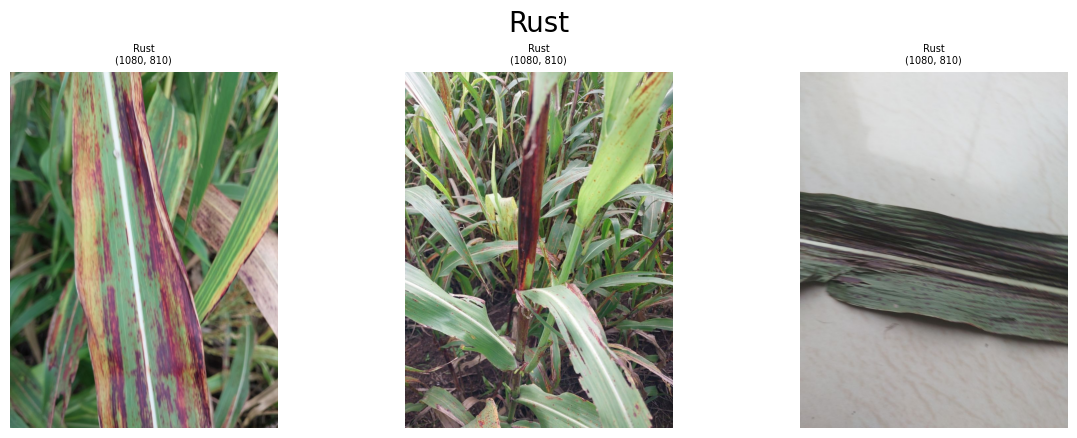

In [6]:
base_dir = "/Users/anushkaroy17/CBAM-ResGANet/Sorghum_Data/Train/Disease/Sorghum Disease Image Dataset"
classes = ["Anthracnose_and_Red_Rot", "Cereal_Grain_molds", "Covered_Kernel_smut", "Head_Smut", "Healthy", "loose_smut", "Rust"]

num_images = 3

for cls in classes:
    class_path = os.path.join(base_dir, cls)
    images = os.listdir(class_path)
    
    selected_images = random.sample(images, min(num_images, len(images)))
    
    plt.figure(figsize=(12, 12))
    plt.suptitle(cls, fontsize=20)
    
    for i, img_name in enumerate(selected_images):
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        shape_text = img.shape[:2]           
        
    
        
        plt.subplot(3, 3, i+1) 
        plt.imshow(img)
        plt.title(f"{cls}\n{shape_text}", fontsize=7)
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()


In [7]:
data_dir = "/Users/anushkaroy17/CBAM-ResGANet/Sorghum_Data/Train/Disease/Sorghum Disease Image Dataset/"

train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomRotation(20),
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], 
                         [0.229, 0.224, 0.225])  # ResNet normalization
])

test_val_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], 
                         [0.229, 0.224, 0.225])
])
full_dataset = datasets.ImageFolder(root=f"{data_dir}", transform=train_transforms)

train_size = int(0.8 * len(full_dataset))
val_size = int(0.1 * len(full_dataset))
test_size = len(full_dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(
    full_dataset,
    [train_size, val_size, test_size],
    generator=torch.Generator().manual_seed(42)
)

val_dataset.dataset.transform = test_val_transforms
test_dataset.dataset.transform = test_val_transforms

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
val_loader   = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=2)
test_loader  = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2)

class_names = full_dataset.classes
num_classes = len(class_names)

print(f"Classes: {class_names}")
print(f"Number of classes: {num_classes}")
print(f"Train: {len(train_dataset)}, Val: {len(val_dataset)}, Test: {len(test_dataset)}")


Classes: ['Anthracnose_and_Red_Rot', 'Cereal_Grain_molds', 'Covered_Kernel_smut', 'Head_Smut', 'Healthy', 'Rust', 'loose_smut']
Number of classes: 7
Train: 23488, Val: 2936, Test: 2936


In [8]:
device = torch.device("mps" if torch.mps.is_available() else "cpu")
print(device)

mps


Epoch 1/5 | Train Acc: 0.9462 | Val Acc: 0.9758
Epoch 2/5 | Train Acc: 0.9732 | Val Acc: 0.9840
Epoch 3/5 | Train Acc: 0.9808 | Val Acc: 0.9915
Epoch 4/5 | Train Acc: 0.9848 | Val Acc: 0.9911
Epoch 5/5 | Train Acc: 0.9876 | Val Acc: 0.9949


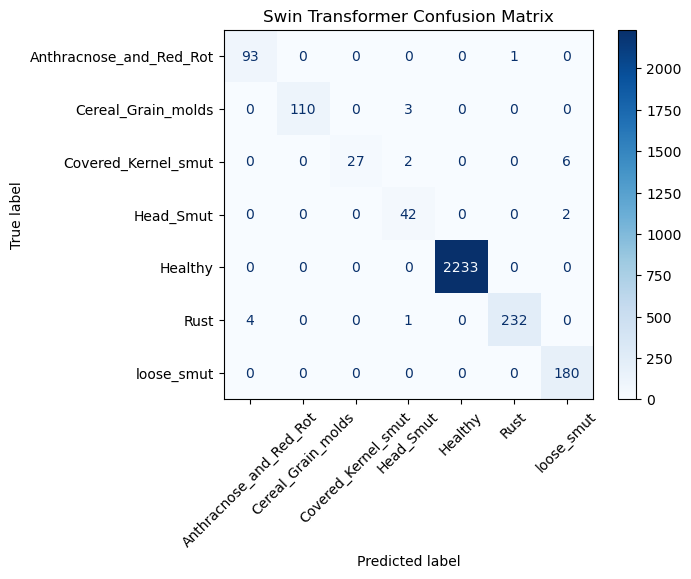

Classification Report:
                         precision    recall  f1-score   support

Anthracnose_and_Red_Rot       0.96      0.99      0.97        94
     Cereal_Grain_molds       1.00      0.97      0.99       113
    Covered_Kernel_smut       1.00      0.77      0.87        35
              Head_Smut       0.88      0.95      0.91        44
                Healthy       1.00      1.00      1.00      2233
                   Rust       1.00      0.98      0.99       237
             loose_smut       0.96      1.00      0.98       180

               accuracy                           0.99      2936
              macro avg       0.97      0.95      0.96      2936
           weighted avg       0.99      0.99      0.99      2936



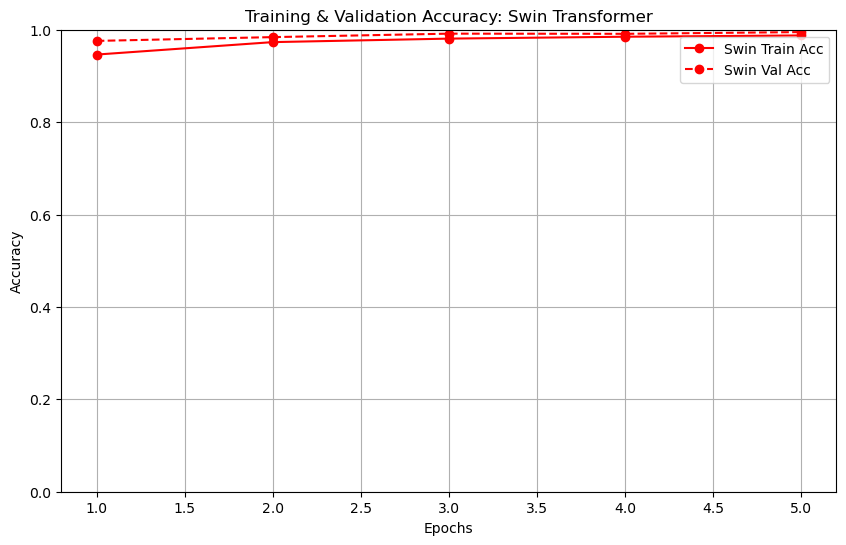

In [9]:
swin = models.swin_t(weights=models.Swin_T_Weights.IMAGENET1K_V1)
for param in swin.parameters():
    param.requires_grad = False

num_classes = len(class_names) 
in_features = swin.head.in_features
swin.head = nn.Sequential(
    nn.Linear(in_features, 128),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(128, num_classes)
)

swin = swin.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(swin.head.parameters(), lr=1e-3)

def train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs=5):
    history = {"train_acc": [], "val_acc": []}

    for epoch in range(num_epochs):
        model.train()
        correct, total, running_loss = 0, 0, 0
        for imgs, labels in train_loader:
            imgs, labels = imgs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(imgs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

        train_acc = correct / total

        model.eval()
        correct, total = 0, 0
        with torch.no_grad():
            for imgs, labels in val_loader:
                imgs, labels = imgs.to(device), labels.to(device)
                outputs = model(imgs)
                _, preds = torch.max(outputs, 1)
                correct += (preds == labels).sum().item()
                total += labels.size(0)
        val_acc = correct / total

        history["train_acc"].append(train_acc)
        history["val_acc"].append(val_acc)

        print(f"Epoch {epoch+1}/{num_epochs} | Train Acc: {train_acc:.4f} | Val Acc: {val_acc:.4f}")

    return history
history = train_model(swin, criterion, optimizer, train_loader, val_loader, num_epochs=5)

swin.eval()
all_preds, all_labels = [], []
with torch.no_grad():
    for imgs, labels in test_loader:
        imgs, labels = imgs.to(device), labels.to(device)
        outputs = swin(imgs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Swin Transformer Confusion Matrix")
plt.show()

print("Classification Report:")
print(classification_report(all_labels, all_preds, target_names=class_names))

epochs = range(1, len(history["train_acc"]) + 1)
plt.figure(figsize=(10,6))
plt.plot(epochs, history["train_acc"], 'r-o', label='Swin Train Acc')
plt.plot(epochs, history["val_acc"], 'r--o', label='Swin Val Acc')
plt.title("Training & Validation Accuracy: Swin Transformer")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()


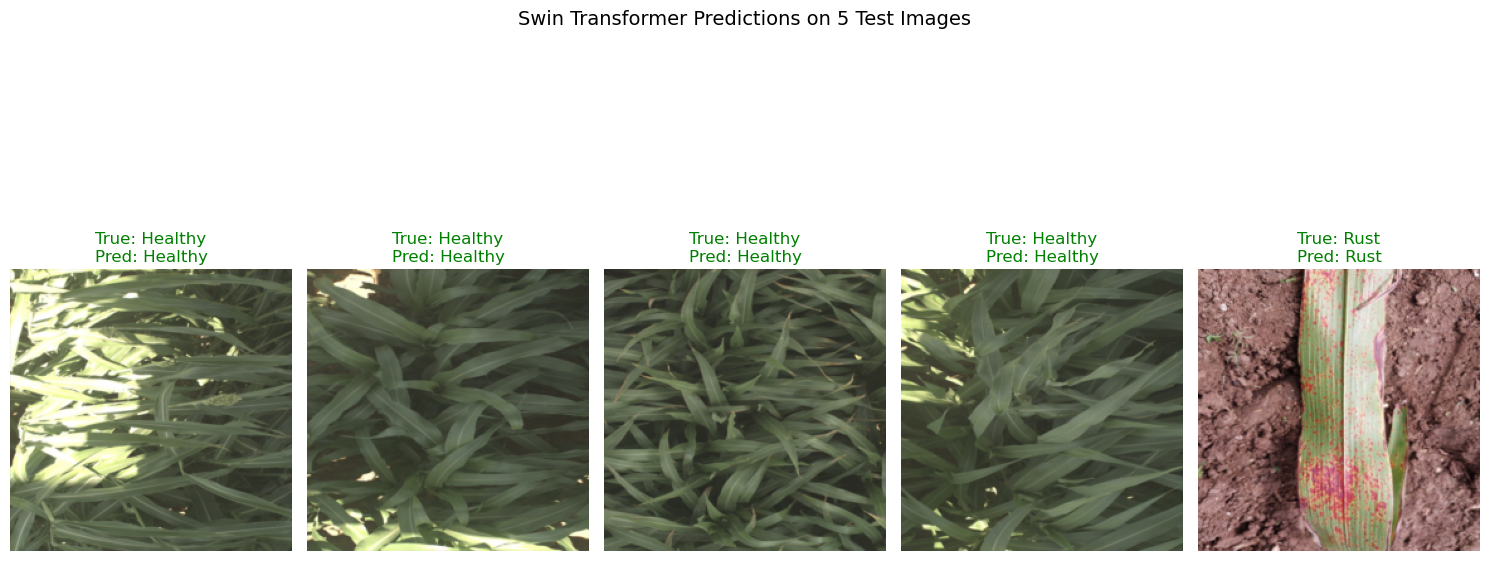

In [10]:
swin.eval()
indices = random.sample(range(len(test_dataset)), 5)
plt.figure(figsize=(15, 8))
for i, idx in enumerate(indices):
    img, label = test_dataset[idx]
    img_input = img.unsqueeze(0).to(device)

    with torch.no_grad():
        outputs = swin(img_input)
        _, pred = torch.max(outputs, 1)

    true_label = class_names[label]
    predicted_label = class_names[pred.item()]
    img_display = img.cpu().permute(1, 2, 0).numpy()
    img_display = img_display * [0.229, 0.224, 0.225] + [0.485, 0.456, 0.406]
    img_display = np.clip(img_display, 0, 1)

    plt.subplot(1, 5, i + 1)
    plt.imshow(img_display)
    plt.title(f"True: {true_label}\nPred: {predicted_label}",
              color=("green" if true_label == predicted_label else "red"))
    plt.axis("off")
plt.suptitle("Swin Transformer Predictions on 5 Test Images", fontsize=14)
plt.tight_layout()
plt.show()


Epoch 1/5 | Train Acc: 0.9433 | Val Acc: 0.9758
Epoch 2/5 | Train Acc: 0.9725 | Val Acc: 0.9898
Epoch 3/5 | Train Acc: 0.9803 | Val Acc: 0.9922
Epoch 4/5 | Train Acc: 0.9846 | Val Acc: 0.9922
Epoch 5/5 | Train Acc: 0.9877 | Val Acc: 0.9952


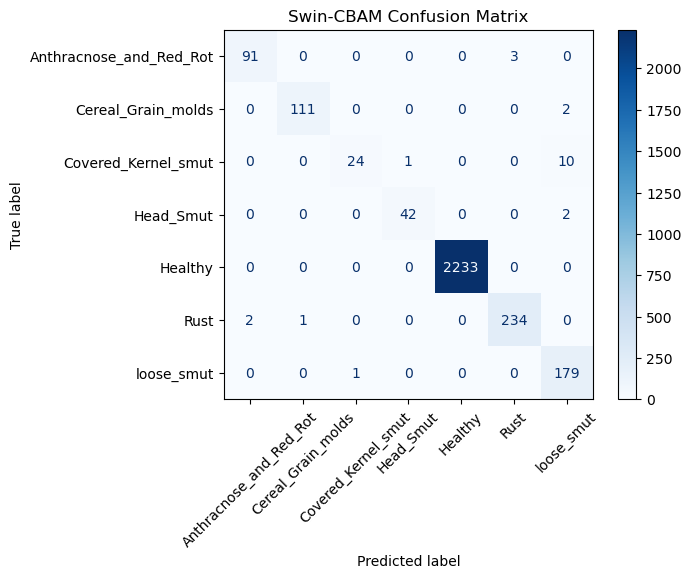

Classification Report:
                         precision    recall  f1-score   support

Anthracnose_and_Red_Rot       0.98      0.97      0.97        94
     Cereal_Grain_molds       0.99      0.98      0.99       113
    Covered_Kernel_smut       0.96      0.69      0.80        35
              Head_Smut       0.98      0.95      0.97        44
                Healthy       1.00      1.00      1.00      2233
                   Rust       0.99      0.99      0.99       237
             loose_smut       0.93      0.99      0.96       180

               accuracy                           0.99      2936
              macro avg       0.97      0.94      0.95      2936
           weighted avg       0.99      0.99      0.99      2936



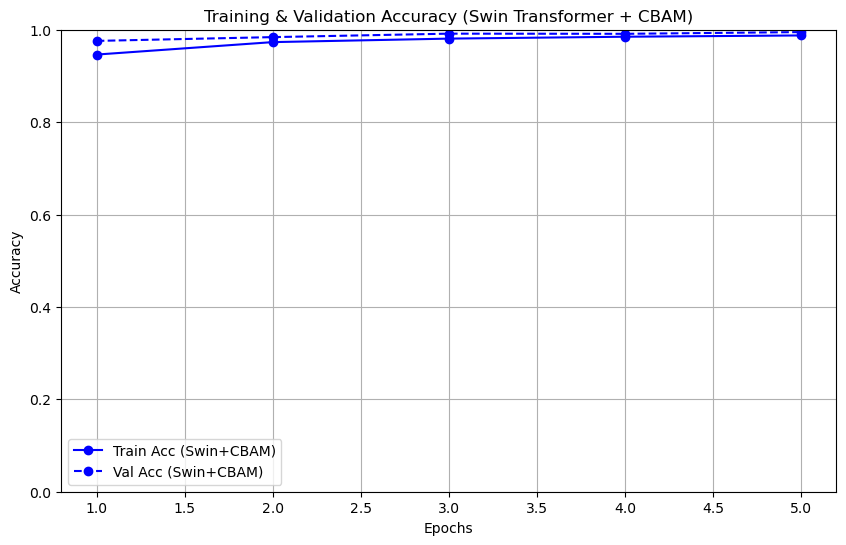

In [11]:

class ChannelAttention(nn.Module):
    def __init__(self, in_channels, reduction_ratio=16):
        super().__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.max_pool = nn.AdaptiveMaxPool2d(1)
        self.fc = nn.Sequential(
            nn.Linear(in_channels, in_channels // reduction_ratio, bias=False),
            nn.ReLU(inplace=True),
            nn.Linear(in_channels // reduction_ratio, in_channels, bias=False)
        )
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # x: (B, C, H, W)
        avg_out = self.fc(self.avg_pool(x).view(x.size(0), -1))
        max_out = self.fc(self.max_pool(x).view(x.size(0), -1))
        attn = self.sigmoid(avg_out + max_out).unsqueeze(-1).unsqueeze(-1)
        return x * attn

class SpatialAttention(nn.Module):
    def __init__(self, kernel_size=7):
        super().__init__()
        padding = kernel_size // 2
        self.conv = nn.Conv2d(2, 1, kernel_size, padding=padding, bias=False)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        avg_out = torch.mean(x, dim=1, keepdim=True)
        max_out, _ = torch.max(x, dim=1, keepdim=True)
        x_cat = torch.cat([avg_out, max_out], dim=1)
        attn = self.sigmoid(self.conv(x_cat))
        return x * attn

class CBAM(nn.Module):
    def __init__(self, in_channels, reduction_ratio=16, kernel_size=7):
        super().__init__()
        self.channel_attn = ChannelAttention(in_channels, reduction_ratio)
        self.spatial_attn = SpatialAttention(kernel_size)

    def forward(self, x):
        x = self.channel_attn(x)
        x = self.spatial_attn(x)
        return x

swin = models.swin_t(weights=models.Swin_T_Weights.IMAGENET1K_V1)
for param in swin.parameters():
    param.requires_grad = False

num_classes = len(class_names)
in_features = swin.head.in_features

class SwinCBAMClassifier(nn.Module):
    def __init__(self, backbone, num_classes):
        super().__init__()
        self.backbone = backbone
        self.cbam = CBAM(in_channels=backbone.head.in_features)
        self.head = nn.Sequential(
            nn.Linear(backbone.head.in_features, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        x = self.backbone.features(x)
        x = self.backbone.norm(x)
        x = x.permute(0, 3, 1, 2).contiguous()  # (B, C, H, W) for CBAM
        x = self.cbam(x)
        x = F.adaptive_avg_pool2d(x, (1,1))
        x = torch.flatten(x, 1)
        x = self.head(x)
        return x

swin_cbam = SwinCBAMClassifier(swin, num_classes).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(list(swin_cbam.cbam.parameters()) + list(swin_cbam.head.parameters()), lr=1e-3)


def train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs=5):
    history = {"train_acc": [], "val_acc": []}

    for epoch in range(num_epochs):
        model.train()
        correct, total, running_loss = 0, 0, 0
        for imgs, labels in train_loader:
            imgs, labels = imgs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(imgs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

        train_acc = correct / total
        history["train_acc"].append(train_acc)

        model.eval()
        correct, total = 0, 0
        with torch.no_grad():
            for imgs, labels in val_loader:
                imgs, labels = imgs.to(device), labels.to(device)
                outputs = model(imgs)
                _, preds = torch.max(outputs, 1)
                correct += (preds == labels).sum().item()
                total += labels.size(0)
        val_acc = correct / total
        history["val_acc"].append(val_acc)

        print(f"Epoch {epoch+1}/{num_epochs} | Train Acc: {train_acc:.4f} | Val Acc: {val_acc:.4f}")

    return history

history_cbam = train_model(swin_cbam, criterion, optimizer, train_loader, val_loader, num_epochs=5)
swin_cbam.eval()
all_preds, all_labels = [], []
with torch.no_grad():
    for imgs, labels in test_loader:
        imgs, labels = imgs.to(device), labels.to(device)
        outputs = swin_cbam(imgs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Swin-CBAM Confusion Matrix")
plt.show()

print("Classification Report:")
print(classification_report(all_labels, all_preds, target_names=class_names))

epochs = range(1, len(history["train_acc"]) + 1)
plt.figure(figsize=(10,6))
plt.plot(epochs, history["train_acc"], 'b-o', label='Train Acc (Swin+CBAM)')
plt.plot(epochs, history["val_acc"], 'b--o', label='Val Acc (Swin+CBAM)')
plt.title("Training & Validation Accuracy (Swin Transformer + CBAM)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()

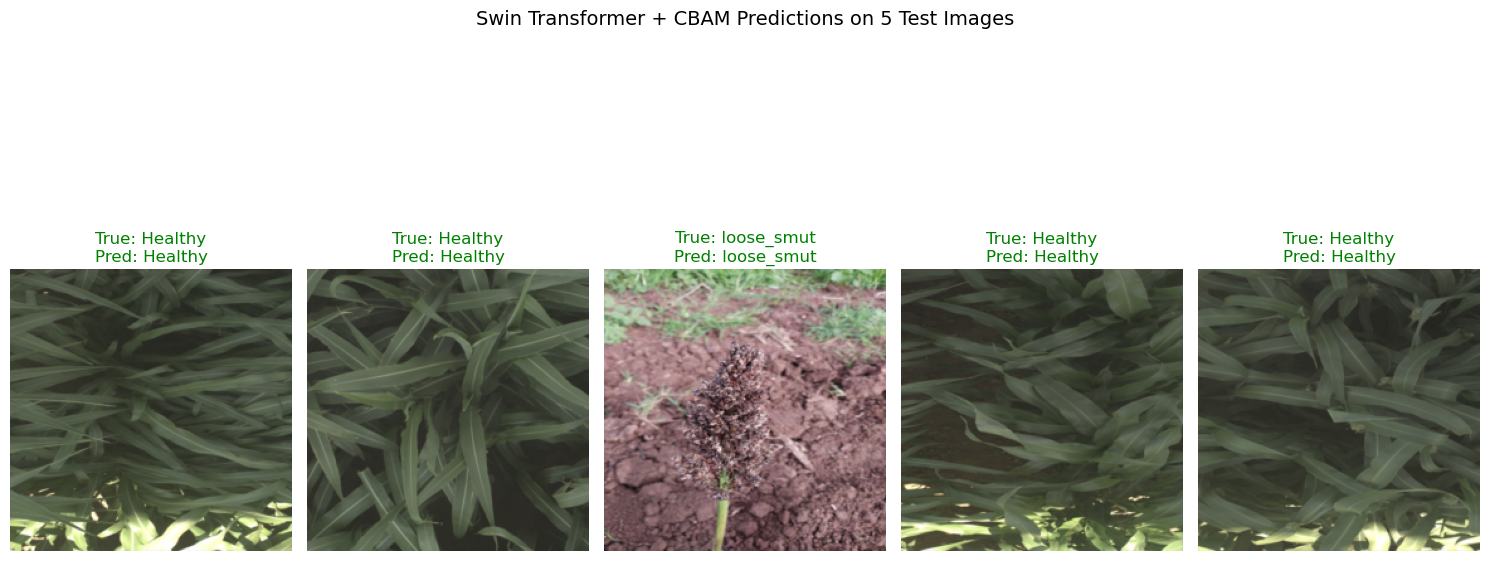

In [12]:
swin_cbam.eval()
indices = random.sample(range(len(test_dataset)), 5)
plt.figure(figsize=(15, 8))
for i, idx in enumerate(indices):
    img, label = test_dataset[idx]
    img_input = img.unsqueeze(0).to(device)

    with torch.no_grad():
        outputs = swin_cbam(img_input)
        _, pred = torch.max(outputs, 1)

    true_label = class_names[label]
    predicted_label = class_names[pred.item()]
    img_display = img.cpu().permute(1, 2, 0).numpy()
    img_display = img_display * [0.229, 0.224, 0.225] + [0.485, 0.456, 0.406]
    img_display = np.clip(img_display, 0, 1)

    plt.subplot(1, 5, i + 1)
    plt.imshow(img_display)
    plt.title(f"True: {true_label}\nPred: {predicted_label}",
              color=("green" if true_label == predicted_label else "red"))
    plt.axis("off")
plt.suptitle("Swin Transformer + CBAM Predictions on 5 Test Images", fontsize=14)
plt.tight_layout()
plt.show()


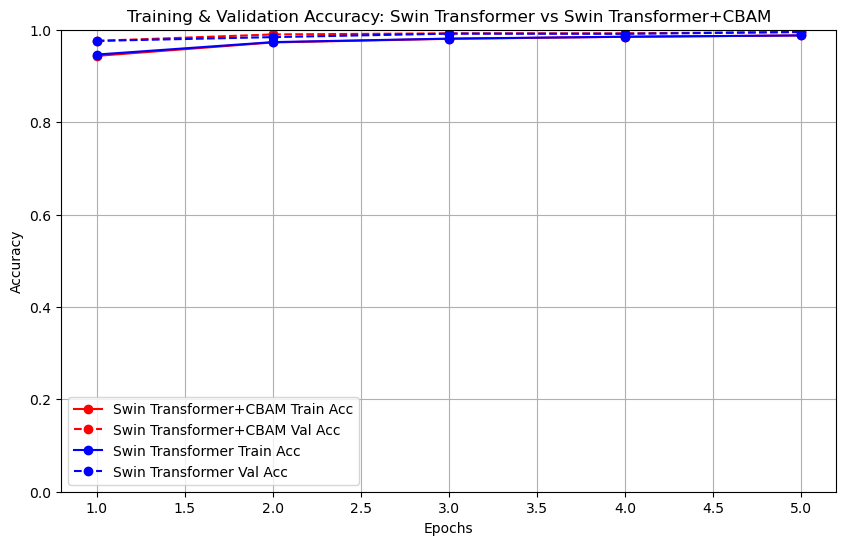

In [13]:
stf_val_acc = history['val_acc']
stf_train_acc = history['train_acc']


stf_cbam_val_acc = history_cbam['val_acc']
stf_cbam_train_acc = history_cbam['train_acc']



epochs = range(1, len(stf_val_acc) + 1)

plt.figure(figsize=(10,6))

plt.plot(epochs, stf_cbam_train_acc, 'r-o', label='Swin Transformer+CBAM Train Acc')
plt.plot(epochs, stf_cbam_val_acc, 'r--o', label='Swin Transformer+CBAM Val Acc')

plt.plot(epochs, stf_train_acc, 'b-o', label='Swin Transformer Train Acc')
plt.plot(epochs, stf_val_acc, 'b--o', label='Swin Transformer Val Acc')

plt.title("Training & Validation Accuracy: Swin Transformer vs Swin Transformer+CBAM")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()
